## In this notebook we will see the most commonly use Plots/Graphs in data science with Toy case and practical example

![viz](https://sm.pcmag.com/t/pcmag_in/feature/1/10-free-da/10-free-data-visualization-tools_5un4.1920.jpg)

## We can increase our plot understanding by applying the following code

`plt.title(“My Title”)` will add a title “My Title” to your plot

`plt.xlabel(“Year”)` will add a label “Year” to your x-axis

`plt.ylabel(“Population”)` will add a label “Population” to your y-axis

`plt.xticks([1, 2, 3, 4, 5])` set the numbers on the x-axis to be 1, 2, 3, 4, 5. We can also pass and labels as a second argument. 

For, example, if we use this code `plt.xticks([1, 2, 3, 4, 5]`, ["1M", "2M", "3M", "4M", "5M"]), it will set the labels 1M, 2M, 3M, 4M, 5M on the x-axis.

`plt.yticks()` - works the same as plt.xticks(), but for the y-axis.

`plt.figure(figsize=(12,10))` - we can adjust the size of figure using this


### Importing libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

### Read dataset

In [2]:
mobile = pd.read_csv('../input/mobile-price-classification/train.csv')
titanic = pd.read_csv('../input/c/titanic/train.csv')
house = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

# Datetime dataset
comp = pd.read_csv('../input/time-series-starter-dataset/Month_Value_1.csv',parse_dates=['Period'])

# Bar Chart

## Toy Example

<AxesSubplot:xlabel='Day', ylabel='Hours'>

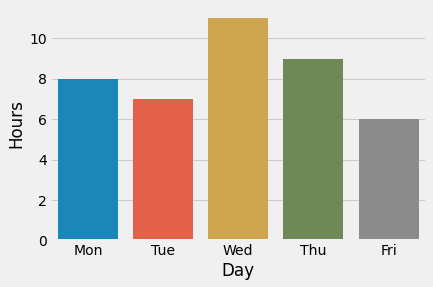

In [3]:
ds = {'Day':['Mon', 'Tue', 'Wed', 'Thu', 'Fri'], 'Hours':[8,7,11,9,6]}
dx = pd.DataFrame(ds)
sns.barplot(x='Day', y='Hours', data=dx)

`sns.barplot(x='Day', y='Hours', data=dx)`

`x` : for x axis (Column name)

`y` : for y axis (Column name)

`data` = dataframe where we take column


## Practical Example

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

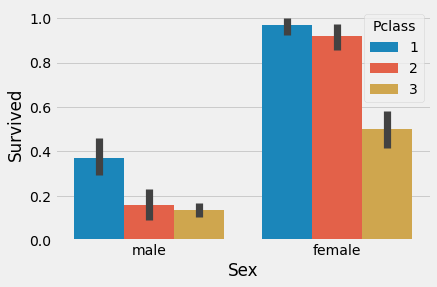

In [4]:
sns.barplot(y='Survived', x='Sex', hue='Pclass', data=titanic)

* We see that in 1 Pclass more male as well as feamale survive

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

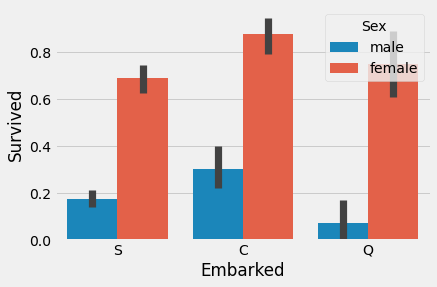

In [5]:
sns.barplot(y='Survived', x='Embarked', hue='Sex', data=titanic)

* In C embark more male feamale survived

Ignore the gray line that define confidence interval (it because our dataset has NaN values)

# Line Chart

<AxesSubplot:xlabel='Day', ylabel='Hours'>

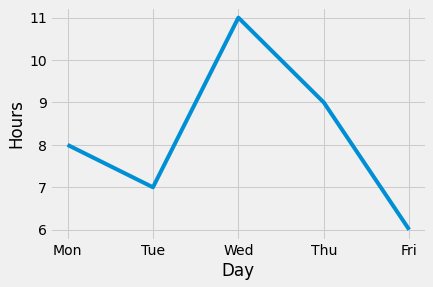

In [6]:
sns.lineplot(x='Day',y='Hours', data=dx)

<AxesSubplot:xlabel='Period', ylabel='Sales_quantity'>

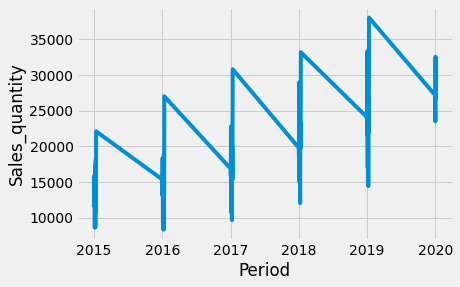

In [7]:
sns.lineplot(x='Period',y='Sales_quantity', data=comp)

* Sales quantity are decreasing at the starting of the year  
* overall increasing in sales quantity over time

# Scatterplot

In [8]:
# To get insight from dataset
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
                
        # Coumn for dtypes
        dtype = df.dtypes
        
        # Column for Unique values
        num_unique = []
        for col in df.columns:
            num_unique.append(df[col].nunique())
        num_unique = pd.Series(num_unique)
        num_unique.index = df.columns
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent,dtype,num_unique], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values', 2:'Data Types', 3:'Unique_values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values('% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].shape[0]) + 
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns,num_unique
a, k = missing_values_table(house)
k.index = house.columns

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.


In [9]:
x = range(50)
y = range(50) + np.random.randint(0,20,50)

<AxesSubplot:>

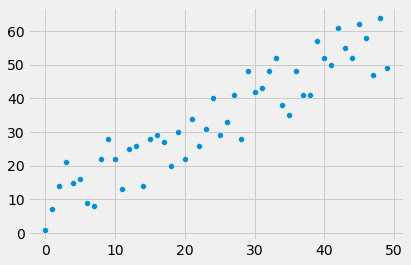

In [10]:
sns.scatterplot(x=x, y=y)

In [11]:
comp.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
1,2015-01-02,1.580759e+07,11636.0,1358.507000,30024676.0
2,2015-01-03,2.204715e+07,15922.0,1384.697024,30024676.0
3,2015-01-04,1.881458e+07,15227.0,1235.606705,30024676.0
4,2015-01-05,1.402148e+07,8620.0,1626.621765,30024676.0


<AxesSubplot:xlabel='Revenue', ylabel='Sales_quantity'>

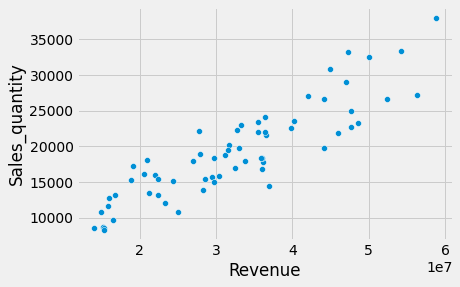

In [12]:
sns.scatterplot(x='Revenue', y='Sales_quantity', data=comp)

* Sales quantity and revenue has positive relation

# Pie Chart

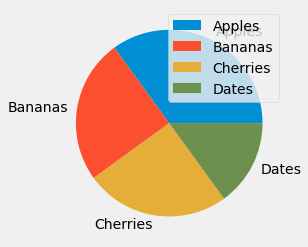

In [13]:
y = np.array([35, 25, 25, 15])
mylabels = ["Apples", "Bananas", "Cherries", "Dates"]
plt.pie(y, labels = mylabels)
plt.legend()
plt.show() 

In [14]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# We require the count of each Embarked so we grou titanic by Embarked
Emtitanic = titanic.groupby('Embarked').size()
Emtitanic

Embarked
C    168
Q     77
S    644
dtype: int64

In [16]:
# Take his index as a labels
labels = Emtitanic.index

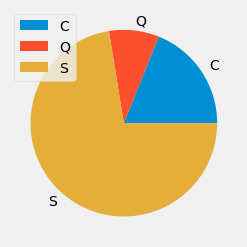

In [17]:
plt.pie(Emtitanic, labels=labels)
plt.legend()
plt.show() 

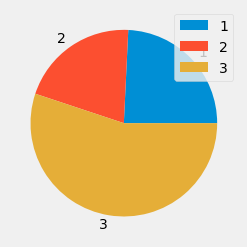

In [18]:
ptitanic = titanic.groupby('Pclass').size()
labels = ptitanic.index
plt.pie(ptitanic, labels=labels)
plt.legend()
plt.show() 

# Heat Map

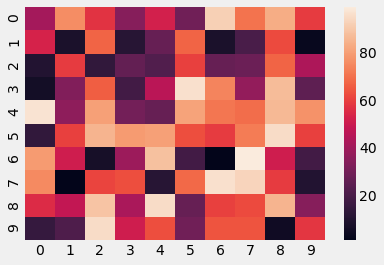

In [19]:
# generating 2-D 10x10 matrix of random numbers
# from 1 to 100
data = np.random.randint(low=1,	high=100,size=(10, 10))
# plotting the heatmap
hm = sns.heatmap(data=data)
plt.show()


<AxesSubplot:>

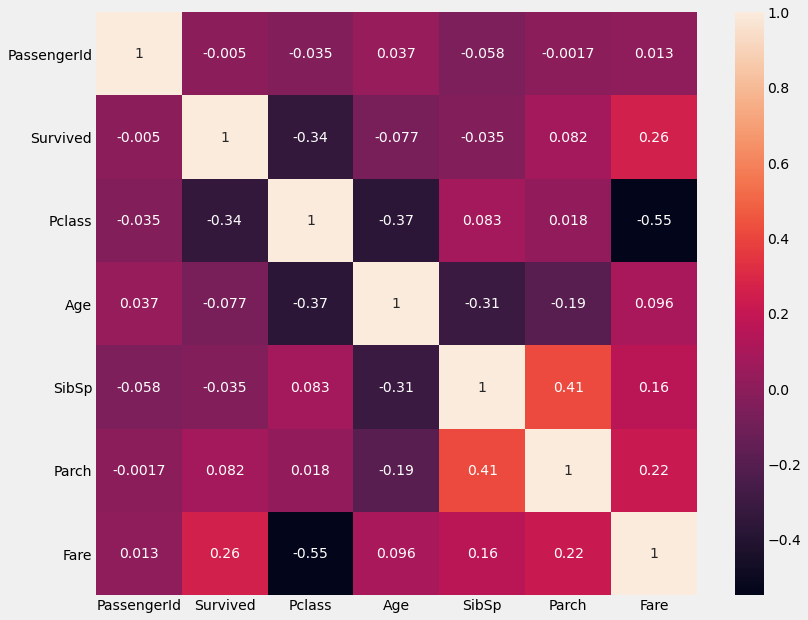

In [20]:
# Create a dataframe that contains correlation of features
corrtitanic = titanic.corr()

# Plot heatmap of correlation map
plt.figure(figsize=(12,10))
sns.heatmap(corrtitanic, annot=True)

* Fare and Pclass are strong negatively correlated
* SibSp and Parch are strong positively correlated

# Histogram

<AxesSubplot:ylabel='Count'>

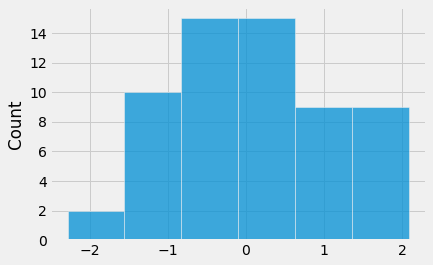

In [21]:
x = np.random.normal(size=60)
sns.histplot(x,bins=6)

<AxesSubplot:xlabel='Sales_quantity', ylabel='Count'>

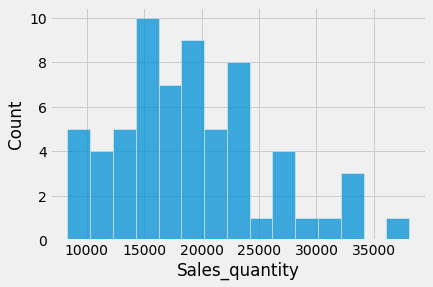

In [22]:
sns.histplot(comp.Sales_quantity, bins=15)

# Box Plot

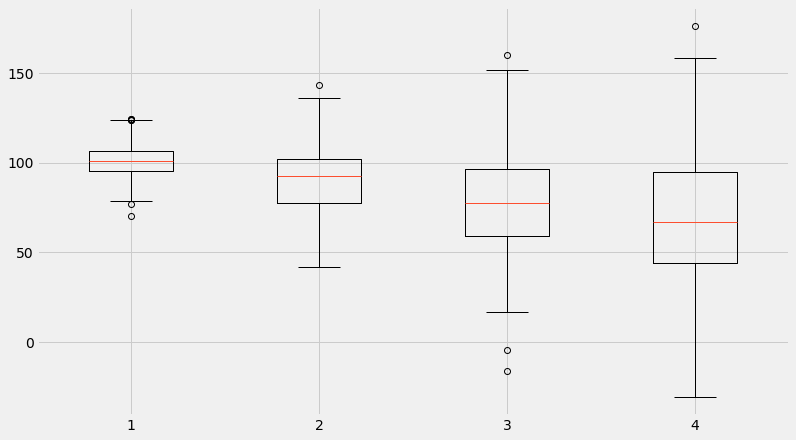

In [23]:
# Creating dataset
np.random.seed(10)
data_1 = np.random.normal(100, 10, 200)
data_2 = np.random.normal(90, 20, 200)
data_3 = np.random.normal(80, 30, 200)
data_4 = np.random.normal(70, 40, 200)
data = [data_1, data_2, data_3, data_4]
fig = plt.figure(figsize =(12, 7))
plt.boxplot(data)
# show plot
plt.show()


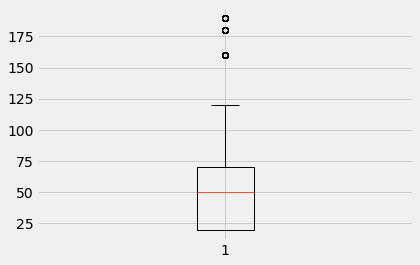

In [24]:
plt.boxplot(house.MSSubClass)
plt.show()

* we have few outliers in MSSubClass

In [25]:
mobile.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


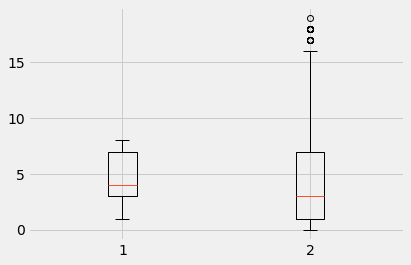

In [26]:
#  plot multiple boxplot together
# Create a list of features 
features = [mobile.n_cores, mobile.fc]
plt.boxplot(features)
plt.show()

* fc featues has some outliers

# Tree Map

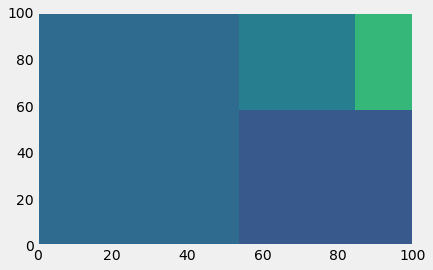

In [27]:
import squarify # pip install squarify
sizes = [50, 25, 12, 6]
squarify.plot(sizes)
plt.show()

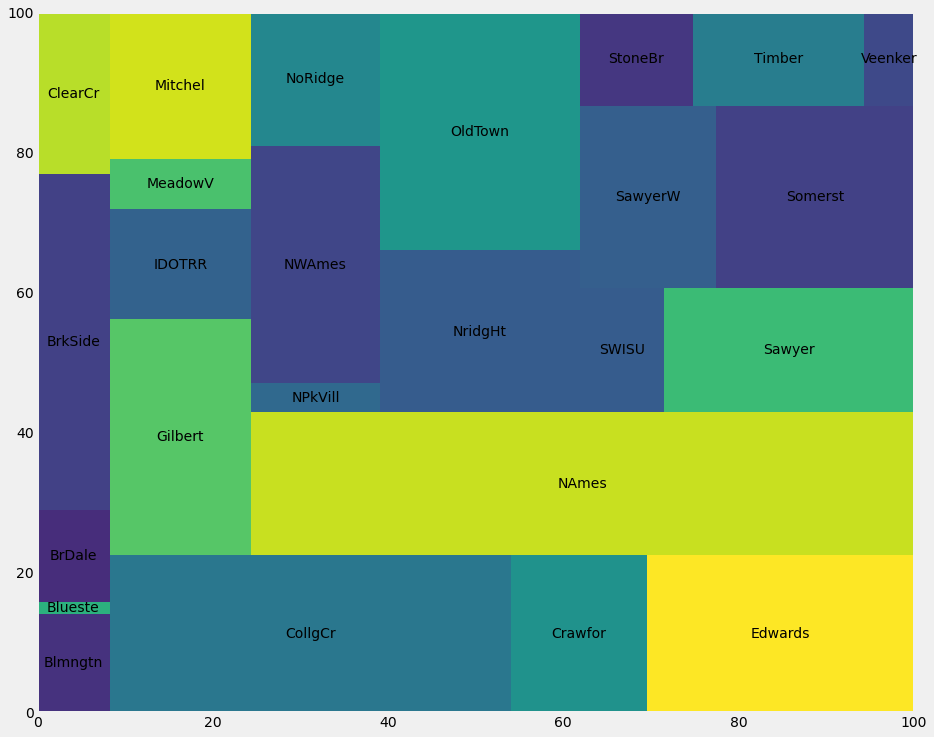

In [28]:
plt.figure(figsize=(14,12))
ptitanic = house.groupby('Neighborhood').size()
labels = ptitanic.index
squarify.plot(ptitanic, label=labels)
plt.show() 

* we can see distribution of each Neighborhood compare with each other

## I hope this Helpful 😃